In [1]:
import os
from importlib import reload

import numpy as np

import octopus.dataset as ds
import octopus.visualization.plotting as vis
from octopus.core import metrics

In [2]:
reload(metrics)
reload(vis)

<module 'octopus.visualization.plotting' from '/Users/uzaykaradag/Developer/octopus/octopus/visualization/plotting.py'>

In [4]:
scans, initials, gts = ds.load_dataset()

PRED_DIR = '/Users/uzaykaradag/Developer/octopus/2024-08-13-02'
FILE_LIST = os.listdir(PRED_DIR)

preds = {f[:-4]: np.load(os.path.join(PRED_DIR, f)) for f in FILE_LIST if f.endswith('.npy')}

index_list = list(preds.keys())

In [5]:
processed_filenames = [os.path.splitext(f)[0] + ".npy" for f in os.listdir(PRED_DIR)]
test_scans = {k: v for k, v in scans.items() if f"{k}.npy" not in processed_filenames}

In [7]:
metrics = metrics.get_metrics_df(preds, gts, scans, index_list)

In [8]:
print(metrics.drop(['Scan'], axis=1).mean())

Dice                  0.729350
IoU                   0.577267
Sensitivity           0.674924
FPR                   0.001661
RMSE                  0.067676
Hausdorff Distance    7.499439
dtype: float64


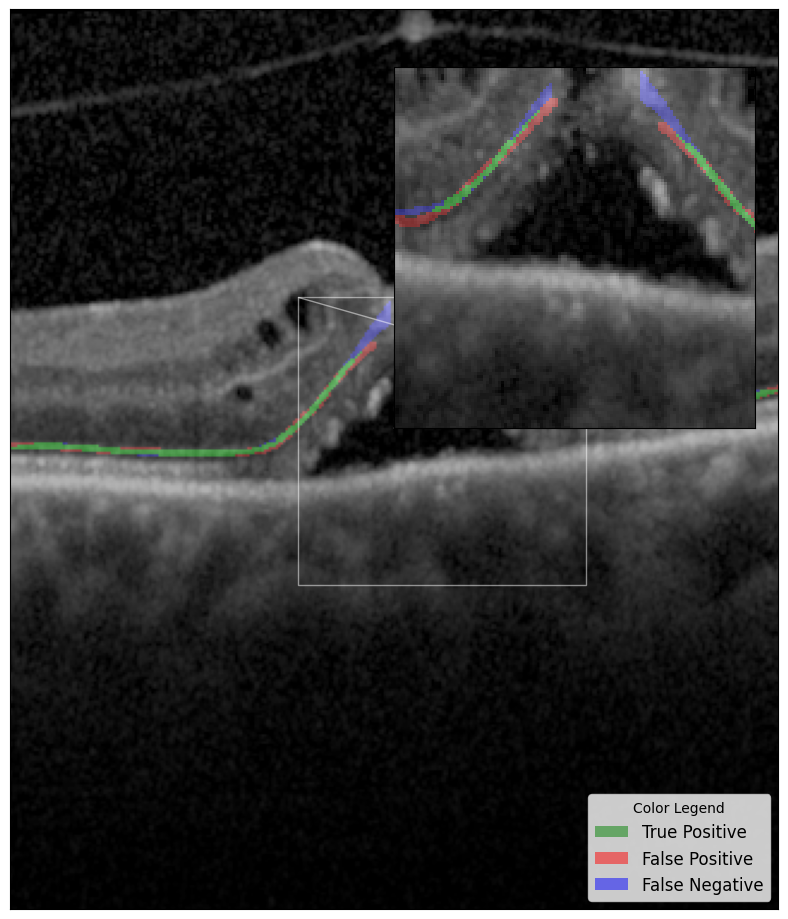

In [36]:
i = index_list[0]
figures = vis.advanced_display_scan(scans[i], {'OCTOPUS': preds[i]}, gt_elm=gts[i], zoom_region=(240, 120, 240, 120))